# Project explore

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

In [2]:
data_path="ml_project1_data.xlsx"

df=pd.read_excel(data_path, index_col=0)

# Split Data

In [3]:
from sklearn.model_selection import train_test_split 
seed = 0
test_size = 0.2
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns = ['Response']), df['Response'], test_size=test_size, random_state=seed, stratify = df['Response'])



In [4]:
df = pd.concat([x_train,y_train], axis = 1)

# export to csv test partition

df_test = pd.concat([x_test, y_test], axis = 1)
df_test.to_excel("df_TEST.xlsx")

print('Train Nr. obs:\t{}\t==> {:.2%} of Data'.format(df.shape[0],df.shape[0]/2240))
print('Test Nr. obs:\t{}\t==> {:.2%} of Data'.format(df_test.shape[0],df_test.shape[0]/2240))

Train Nr. obs:	1792	==> 80.00% of Data
Test Nr. obs:	448	==> 20.00% of Data


# Explore

In [5]:
# Data in right Format

df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

# test

df_test['Dt_Customer'] = pd.to_datetime(df_test['Dt_Customer'])

In [6]:
display(df.head(3))
print(df.info(), "\nResponse rate: {}%".format(round(100*df["Response"].mean(), 2)))

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,
67,1972,Master,Single,46423.0,1,1,2013-09-18,6,68,0,...,7,0,0,0,0,0,0,3,11,0
3828,1951,Graduation,Married,71107.0,0,1,2013-02-17,61,533,10,...,4,0,0,0,0,0,0,3,11,0
3409,1984,Graduation,Single,36108.0,1,0,2013-10-15,68,141,8,...,9,1,0,0,0,0,0,3,11,0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1792 entries, 67 to 8026
Data columns (total 28 columns):
Year_Birth             1792 non-null int64
Education              1792 non-null object
Marital_Status         1792 non-null object
Income                 1772 non-null float64
Kidhome                1792 non-null int64
Teenhome               1792 non-null int64
Dt_Customer            1792 non-null datetime64[ns]
Recency                1792 non-null int64
MntWines               1792 non-null int64
MntFruits              1792 non-null int64
MntMeatProducts        1792 non-null int64
MntFishProducts        1792 non-null int64
MntSweetProducts       1792 non-null int64
MntGoldProds           1792 non-null int64
NumDealsPurchases      1792 non-null int64
NumWebPurchases        1792 non-null int64
NumCatalogPurchases    1792 non-null int64
NumStorePurchases      1792 non-null int64
NumWebVisitsMonth      1792 non-null int64
AcceptedCmp3           1792 non-null int64
AcceptedCmp4       

### Response rate is 15 %

In [7]:
# Get dataset size saved

df_original_size = len(df)
print (">>>",df_original_size,"Observations")

>>> 1792 Observations


# Missing values

In [8]:
# function that returns number of missings, percentage of missings and if it is above or below 3% threshold

def missing_values_reporter(df):    
    na_count = df.isna().sum() 
    ser = na_count[na_count > 0]
    ser_p = np.round(ser.divide(df.shape[0])*100,2)
    tmp = pd.DataFrame({"N missings": ser,"% missings": ser_p,"Above Threshold (3%)": False})
    tmp.loc[tmp["% missings"] > 3., 'Above Threshold (3%)'] = 'True' 
    return tmp

In [9]:
df_miss=missing_values_reporter(df)
df_miss

,N missings,% missings,Above Threshold (3%)
Income,20,1.12,False


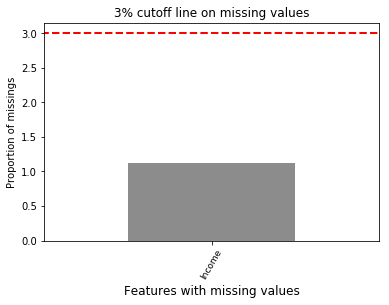

In [10]:
# cutoff is in percentage

cutoff_ = 3

cutoff_list = [cutoff_, cutoff_]
#plt.figure(figsize=(15,5))
ax = df_miss.sort_values('% missings', ascending=False).plot.bar(y="% missings", 
                                                                 color="Grey",
                                                                 alpha = 0.9,
                                                                 title="{}% cutoff line on missing values".format(cutoff_),
                                                                 legend=False)
ax.set_xlabel("Features with missing values", size=12)
ax.set_ylabel("Proportion of missings")
ax.plot([-1, len(df_miss.index)], cutoff_list,'r--', lw=2)
ax.set_xticklabels(df_miss.index, rotation=60, size=9)
plt.show()

In [11]:
# delete missing values (automate process..)

df.dropna(inplace=True)

# test
#df_test.dropna(inplace=True)

In [12]:
df.shape

(1772, 28)

# Describe categorical features

In [13]:
df.describe(include=["object", "category"])

,Education,Marital_Status
count,1772,1772
unique,5,8
top,Graduation,Married
freq,895,686


In [14]:
def describe_cat(df, list_cfeatures, target):
    cat_list = []
    for feature in df[list_cfeatures]:    
        cat_list.append(df.groupby([feature]).agg({target: ['count', "mean"]}))
    return pd.concat(cat_list, axis=0, keys=list_cfeatures)

In [15]:
df_cat=describe_cat(df, df.select_dtypes(include=["object", "category"]).columns, "Response")
df_cat

Response          
                             count      mean
Education      2n Cycle        152  0.098684
               Basic            48  0.041667
               Graduation      895  0.140782
               Master          296  0.155405
               PhD             381  0.202100
Marital_Status Absurd            2  0.500000
               Alone             2  0.500000
               Divorced        183  0.224044
               Married         686  0.102041
               Single          377  0.230769
               Together        454  0.110132
               Widow            66  0.227273
               YOLO              2  0.500000

# !!!!!!!!!!!!!
# Missings nas categoricas

In [16]:
# remove unwanted categories

education_cat = ['2n Cycle','Basic','Graduation','Master','PhD']
marital_cat = ['Divorced','Divorced','Married','Single','Together','Widow']

df = df[df['Education'].isin(education_cat)]
df = df[df['Marital_Status'].isin(marital_cat)]

# test

#df_test = df_test[df_test['Education'].isin(education_cat)]
#df_test = df_test[df_test['Marital_Status'].isin(marital_cat)]

In [17]:
df_cat=describe_cat(df, df.select_dtypes(include=["object", "category"]).columns, "Response")
df_cat

Response          
                             count      mean
Education      2n Cycle        152  0.098684
               Basic            48  0.041667
               Graduation      894  0.139821
               Master          294  0.156463
               PhD             378  0.198413
Marital_Status Divorced        183  0.224044
               Married         686  0.102041
               Single          377  0.230769
               Together        454  0.110132
               Widow            66  0.227273

In [18]:
import matplotlib.ticker as mtick
def categorical_discrimination_plot(df, list_cfeatures, target):
    rm_df_cat = describe_cat(df, list_cfeatures, target)

    cutoff_ = df[target].mean()
    cutoff_list = [cutoff_, cutoff_]
    
    for feature in list_cfeatures:
        df_cat=rm_df_cat.iloc[:, 1][feature].sort_values(ascending=False)
        color_t = ['grey' if x > cutoff_ else 'lightgrey' for x in df_cat]
        plt.figure(figsize=(15,5))
        ax = df_cat.plot.bar(color=color_t,
                             alpha = 0.9,
                             title="{}% cutoff line on discrimination ability".format(round(cutoff_*100, 2)),
                             legend=False)
        ax.set_xticklabels(df_cat.index, rotation=60, size=9)  
        ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
        ax.set_ylabel("Proportion of respondents")
        ax.set_xlabel(feature)
        ax.plot([-1, len(df_cat)], cutoff_list,'r--', lw=2.5, color='firebrick')
        plt.show()

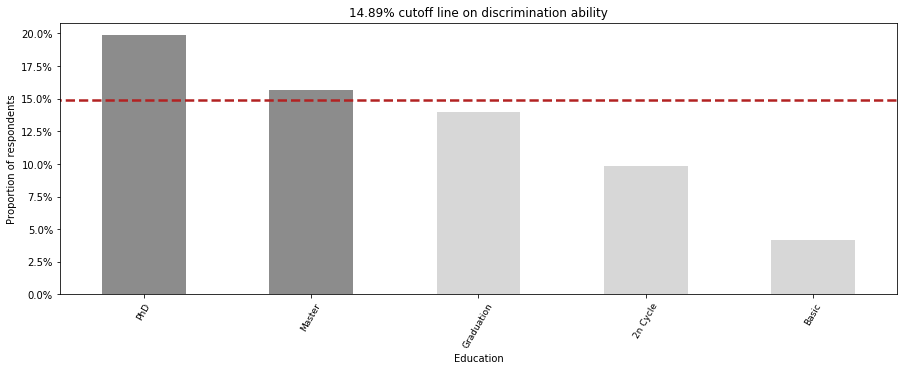

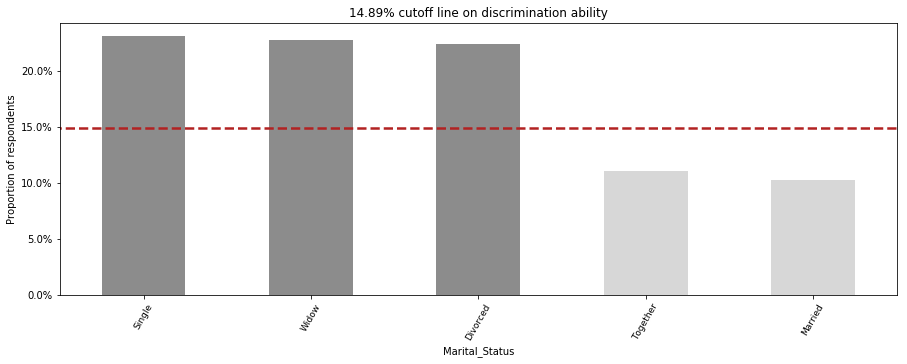

In [19]:
categorical_discrimination_plot(df, df.select_dtypes(include=["object", "category"]).columns, "Response")

# Describe numerical features

In [20]:
describe_num=df.describe(percentiles=np.arange(0.2, .8, .2))
display(describe_num)

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000,...,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000,1766.0,1766.0,1766.000000
mean,1968.855040,51610.984711,0.441676,0.506795,48.771234,299.983579,25.944507,166.294451,36.650623,26.574745,...,5.343148,0.070781,0.070215,0.071348,0.061721,0.013590,0.008494,3.0,11.0,0.148924
std,11.848976,21773.344045,0.531976,0.542483,29.027208,334.011895,39.598685,226.885089,53.410598,40.771926,...,2.398778,0.256532,0.255582,0.257478,0.240717,0.115814,0.091795,0.0,0.0,0.356115
min,1899.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
20%,1957.000000,31761.000000,0.000000,0.000000,19.000000,15.000000,1.000000,11.000000,2.000000,1.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
40%,1967.000000,44159.000000,0.000000,0.000000,38.000000,79.000000,4.000000,34.000000,7.000000,5.000000,...,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,1970.000000,51038.000000,0.000000,0.000000,49.000000,171.000000,8.000000,67.000000,12.000000,8.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
60.0%,1973.000000,57957.000000,1.000000,1.000000,58.000000,277.000000,14.000000,108.000000,20.000000,14.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
80%,1979.000000,71391.000000,1.000000,1.000000,79.000000,577.000000,43.000000,292.000000,65.000000,44.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,1996.000000,162397.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [21]:
# remove useless columns -> Variance equal to zero

In [22]:
const=describe_num.columns[describe_num.loc["std"]<0.01]
print("Columns with zero or almost zero variance to be removed:\n", 
      list(const))

# remove constants
df.drop(labels=const, axis=1, inplace=True) 

# test

df_test.drop(labels=const, axis=1, inplace=True)

Columns with zero or almost zero variance to be removed:
 ['Z_CostContact', 'Z_Revenue']


# !!!!

In [23]:
# Negative features == > meter a zero
print(">>> Any column with negative values?:", 
      (df._get_numeric_data()<0).any().any())

>>> Any column with negative values?: False


# Remove duplicates with different Response values

In [24]:
df_x = df.drop(columns='Response')
df_y = df.Response

In [25]:
df_x[df_x.duplicated(keep=False)].sort_values(by='Income').head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain
ID,,,,,,,,,,,,,,,,,,,,,
10617,1989,Master,Divorced,10979.0,0,0,2014-05-22,34,8,4,...,3,0,3,5,0,0,0,0,0,0
6864,1989,Master,Divorced,10979.0,0,0,2014-05-22,34,8,4,...,3,0,3,5,0,0,0,0,0,0
234,1979,Graduation,Divorced,15287.0,1,0,2012-10-10,60,1,2,...,1,1,2,7,1,0,0,0,0,0
10264,1979,Graduation,Divorced,15287.0,1,0,2012-10-10,60,1,2,...,1,1,2,7,1,0,0,0,0,0
8420,1970,2n Cycle,Married,15315.0,0,0,2013-08-03,27,7,4,...,2,0,4,5,0,0,0,0,0,0


In [26]:
print('Duplicate observations with different target values:',len(df_x[df_x.duplicated(keep=False)])-len(df[df.duplicated(keep=False)]))

Duplicate observations with different target values: 20


In [27]:
duplicates_no_target = list(df_x[df_x.duplicated(keep=False)].index)
duplicates_target = list(df[df.duplicated(keep=False)].index.values)

In [28]:
idx_remove = list(set(duplicates_no_target) - set(duplicates_target))
len(idx_remove)

20

In [29]:
df = df[~df.index.isin(idx_remove)]

# Correlation

In [30]:
target = "Response"
df[target]=df[target].astype('object')
feature_list = df.select_dtypes(include=["int64", "Float64"]).columns.values
feature_list = [x for x in feature_list if not x.startswith(("Year_B","AcceptedCmp"))]
feature_list.append(target)

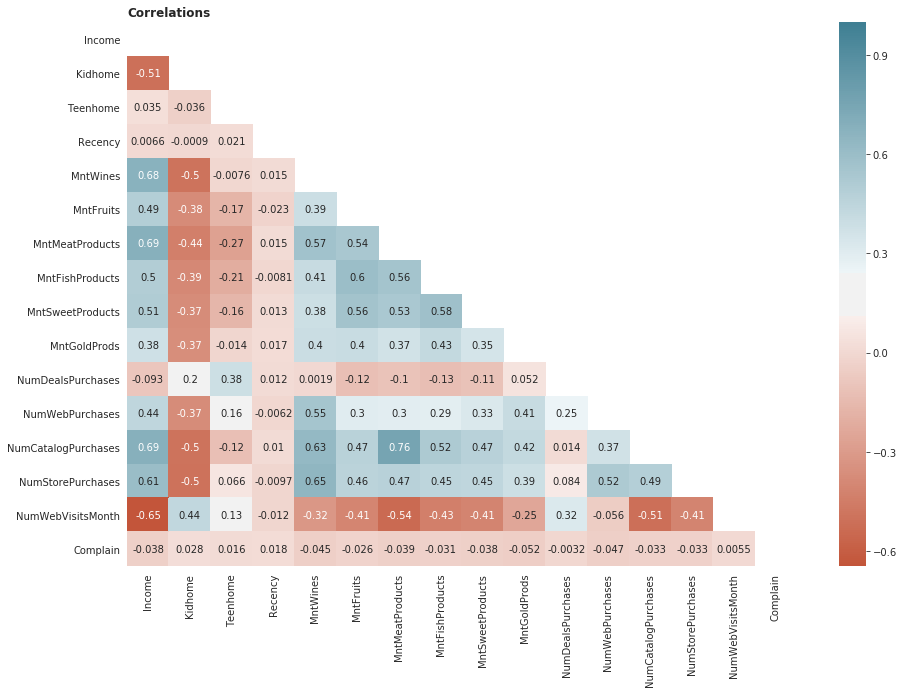

In [31]:
cmap = sns.diverging_palette(20, 220, sep = 20, as_cmap=True)


corr = df[feature_list].corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    plt.figure(figsize = (15,10))
    sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            linewidths=0, annot= True,mask=mask,square=False, cmap = cmap)
plt.title("Correlations", loc = "left", fontweight = "bold")
plt.show()

In [32]:
df.to_excel("df_01.xlsx")
df_test.to_excel('df_test_01.xlsx')